<a href="https://colab.research.google.com/github/sorandomchad/projects/blob/main/rfm-analysis/rfm_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Know Your Customer: RFM Analysis

This project aims to uncover valuable insights by from customer data by analyzing recency, frequency, and monetary behavior. Through RFM analysis, we can identify loyal customers and market to them to increase longevity.

## Task 1: Import Data

In [ ]:
# import data
import pandas as pd

data = pd.read_csv('customer_data.csv')

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


## Task 2: Calculate Recency

*  First, convert the `PurchaseDate` variable to datetime.
* Then, the recency calculation is the number of dates between `PurchaseDate` and the most recent date.

In [ ]:
# import datetime
import datetime

# convert to datetime
data.PurchaseDate = pd.to_datetime(data.PurchaseDate)

# find most recent date
max_date = data.PurchaseDate.max()

# calculate recency
data['Recency'] = (max_date - data.PurchaseDate).dt.days

# inspect data
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60


## Task 3: Calculate Freuency

* Calculate the number of orders for each customer. Call this column 'Frequency'.
* Merge the column back into the original DataFrame.

In [ ]:
# calculate frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()

# rename columns
frequency_data.rename(columns={'OrderID':'Frequency'}, inplace=True)
# frequency_data.head()

# merge data back into original
data = data.merge(frequency_data, on='CustomerID', how='left')

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1
1,2188,2023-04-11,463.70,Product A,176819,London,60,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1


## Task 4: Calculating Monetary Value

* Your task is to group the data by 'CustomerID' and calculate the sum of 'TransactionAmount' for each customer.

* Reset the index of the resulting DataFrame and rename the column containing the sums to 'MonetaryValue'.

* Merge the monetary value data back into the original DataFrame based on 'CustomerID', adding the 'MonetaryValue' column and update the DataFrame with the merged data.

In [ ]:
# calculating money spent for each customer
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

# rename column
monetary_data.rename(columns={'TransactionAmount':'MonetaryValue'}, inplace=True)

# merge data back to original
data = data.merge(monetary_data, on='CustomerID', how='left')

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56


## Task 5: Calculating RFM Values

Scoring RFM Values:
Your task is to define the scoring criteria for each RFM value:

* For Recency: Break down into bins [-1, 30, 60, 90, 180, ∞] with labels [5, 4, 3, 2, 1].

* For Frequency: Break down into bins [0, 1, 2, 3, 4, ∞] with labels [1, 2, 3, 4, 5].

* For Monetary Value: Break down into bins [0, 100, 200, 300, 400, ∞] with labels [1, 2, 3, 4, 5].


Calculate RFM scores:
* Create 'RecencyScore' column by binning 'Recency' values according to defined bins and labels.

* Create 'FrequencyScore' column by binning 'Frequency' values according to defined bins and labels.

* Create 'MonetaryScore' column by binning 'MonetaryValue' values according to defined bins and labels

In [ ]:
# calculate recency score
data['RecencyScore'] = pd.cut(data.Recency, bins=[-1, 30, 60, 90, 180, float('inf')], labels=[5, 4, 3, 2, 1])

# calculate frequency score
data['FrequencyScore'] = pd.cut(data.Frequency, bins=[0, 1, 2, 3, 4, float('inf')], labels=[1, 2, 3, 4, 5])

# calculate monetary score
data['MonetaryScore'] = pd.cut(data.MonetaryValue, bins=[0, 100, 200, 300, 400, float('inf')], labels=[1, 2, 3, 4, 5])

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5


## Task 6: Calculating RFM Score

* Convert the `RecencyScore`, `FrequencyScore`, and `MonetaryScore` variables to `int`
* Calculate `RFM_Score` by adding the three columns

In [ ]:
data.dtypes

,0
CustomerID,int64
PurchaseDate,datetime64[ns]
TransactionAmount,float64
ProductInformation,object
OrderID,int64
Location,object
Recency,int64
Frequency,int64
MonetaryValue,float64
RecencyScore,category


In [ ]:
# convert RFM variables to int
data[['RecencyScore', 'FrequencyScore', 'MonetaryScore']] = data[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].astype('int')

# calculate aggregated RFM score
data['RFM_Score'] = data.RecencyScore + data.FrequencyScore + data.MonetaryScore

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10


## Task 7: Labeling RFM Scores

* Categorize RFM Scores as 'Low-Value', 'Mid-Value', and 'High-Value' based on quantiles.
* Name the column `ValueSegment`.

In [ ]:
# split data into 3 quantiles
data['ValueSegment'] = pd.qcut(data['RFM_Score'], q=3, labels=[ 'Low-Value', 'Mid-Value', 'High-Value'])

data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,ValueSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10,Low-Value


## Task 8: Visualizing RFM Scores

* Create a countplot for RFM segments.
* Label the x-axis with the values of `ValueSegment`.
* Save plot object as `count_plt`.

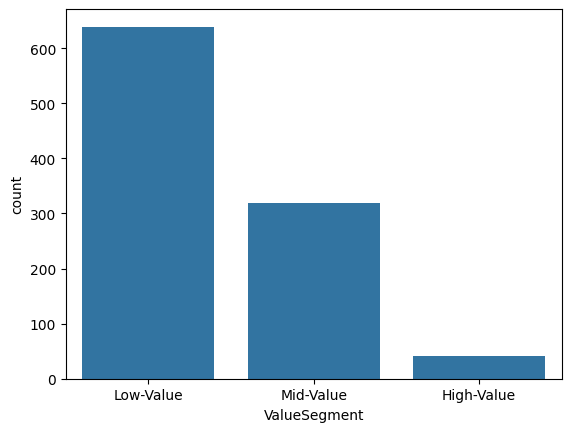

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# create and save countplot
count_plt = sns.countplot(data, x='ValueSegment')
plt.show()